In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import nbodykit.lab as nb

In [19]:
d = {}
d['standard'] = np.load('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/nnbar/nnbar_NGC_knownsystot_mainhighz_512_v7_2_main_512.npy', allow_pickle=True)
d['1z-512'] = np.load('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/nnbar/nnbar_NGC_known_mainhighz_512_v7_2_main_512.npy', allow_pickle=True)
d['2z-512'] = np.load('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/nnbar/nnbar_NGC_known_lowmidhighz_512_v7_2_main_512.npy', allow_pickle=True)
d['1z-256'] = np.load('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/nnbar/nnbar_NGC_known_mainhighz_256_v7_2_main_512.npy', allow_pickle=True)

In [47]:
d = {}
d['standard'] = np.load('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/nnbar/nnbar_NGC_knownsystot_mainhighz_512_v7_2_highz_512.npy', allow_pickle=True)
d['1z-512'] = np.load('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/nnbar/nnbar_NGC_known_mainhighz_512_v7_2_highz_512.npy', allow_pickle=True)
# d['2z-512'] = np.load('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/nnbar/nnbar_NGC_known_lowmidhighz_512_v7_2_main_512.npy', allow_pickle=True)
d['1z-256'] = np.load('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/nnbar/nnbar_NGC_known_mainhighz_256_v7_2_highz_512.npy', allow_pickle=True)

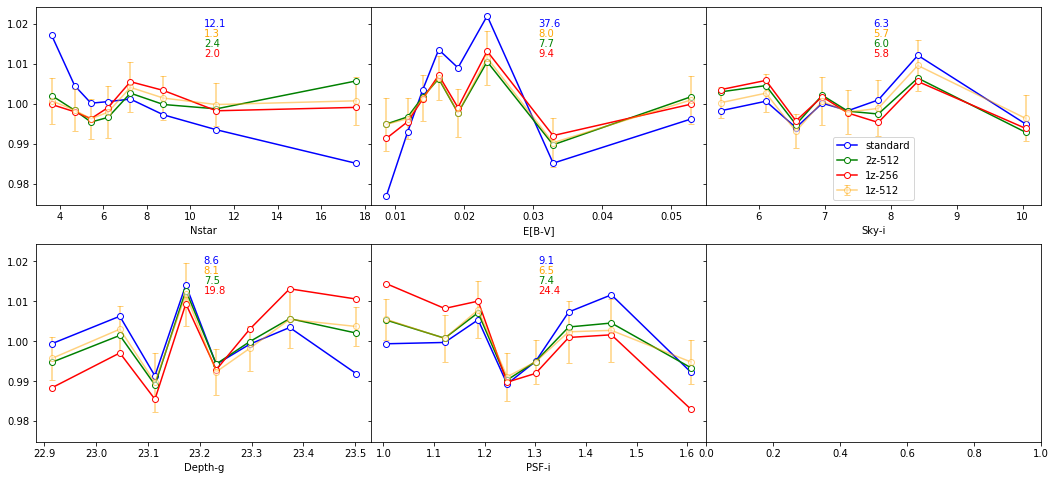

In [39]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(18, 8), sharey=True)
ax = ax.flatten()
fig.subplots_adjust(wspace=0.0)


colors = ['b', 'orange', 'g', 'r']

sys = ['Nstar', 'E[B-V]', 'Sky-i', 'Depth-g', 'PSF-i']
for j, (ni, di) in enumerate(d.items()):
    for i, ix in enumerate([0, 1, 5, 7, 13]):
        
        if ni == '1z-512':
            ax[i].errorbar(di[ix]['bin_avg'], di[ix]['nnbar'], di[ix]['nnbar_err'], 
                           label=ni, marker='o', mfc='w', capsize=3, alpha=0.5, color=colors[j])
        else:
            ax[i].plot(di[ix]['bin_avg'], di[ix]['nnbar'], label=ni, marker='o', mfc='w', color=colors[j])
            
        chi2_ = (((di[ix]['nnbar']-1.0)/di[ix]['nnbar_err'])**2).sum()
        
        ax[i].text(0.5, 0.9-j*0.05, f'{chi2_:.1f}', transform=ax[i].transAxes, color=colors[j])
            
for j, sj in enumerate(sys):
    ax[j].set_xlabel(sj)
    
ax[2].legend()    
fig.savefig('nnbar_methods.png', dpi=300, bbox_inches='tight')

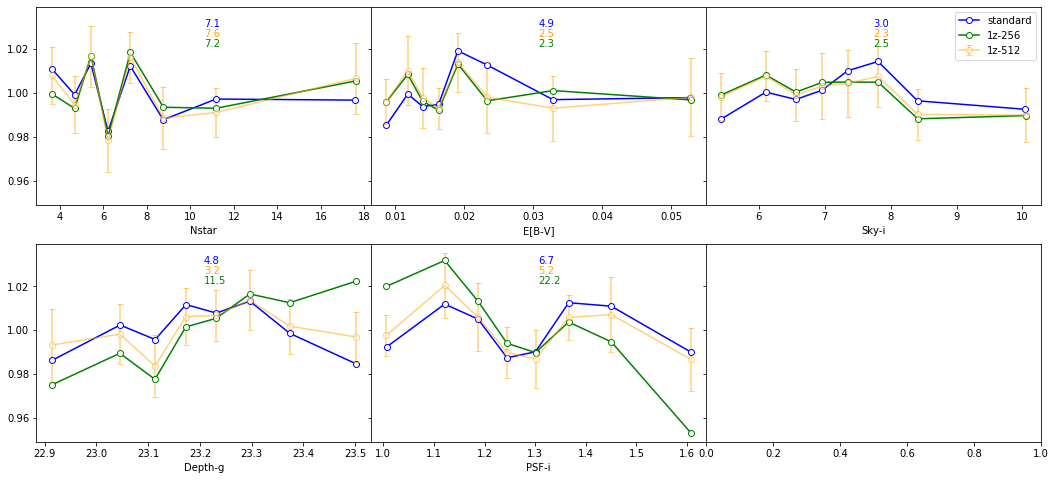

In [48]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(18, 8), sharey=True)
ax = ax.flatten()
fig.subplots_adjust(wspace=0.0)


colors = ['b', 'orange', 'g', 'r']

sys = ['Nstar', 'E[B-V]', 'Sky-i', 'Depth-g', 'PSF-i']
for j, (ni, di) in enumerate(d.items()):
    for i, ix in enumerate([0, 1, 5, 7, 13]):
        
        if ni == '1z-512':
            ax[i].errorbar(di[ix]['bin_avg'], di[ix]['nnbar'], di[ix]['nnbar_err'], 
                           label=ni, marker='o', mfc='w', capsize=3, alpha=0.5, color=colors[j])
        else:
            ax[i].plot(di[ix]['bin_avg'], di[ix]['nnbar'], label=ni, marker='o', mfc='w', color=colors[j])
            
        chi2_ = (((di[ix]['nnbar']-1.0)/di[ix]['nnbar_err'])**2).sum()
        
        ax[i].text(0.5, 0.9-j*0.05, f'{chi2_:.1f}', transform=ax[i].transAxes, color=colors[j])
            
for j, sj in enumerate(sys):
    ax[j].set_xlabel(sj)
    
ax[2].legend()    
fig.savefig('nnbar_methodshiz.png', dpi=300, bbox_inches='tight')

In [40]:
from glob import glob
from matplotlib.gridspec import GridSpec
from scipy.special import gamma

def chi2_pdf(x, k):
    """ Chi2 pdf 
    """
    k2 = k / 2.
    n_ = np.power(x, k2-1.)
    d_ = np.power(2., k2)*gamma(k2)
    return np.exp(-0.5*x)*n_/d_    

def chi2_fn(y, invcov):
    return np.dot(y, np.dot(invcov, y))    

def read_nnbar(path, ix=None):
    d = np.load(path, allow_pickle=True)
    nnbar = []
    if ix is None:        
        for di in d:
            nnbar.append(di['nnbar']-1)
    else:
        for i in ix:
            di = d[i]
            nnbar.append(di['nnbar']-1)
    return np.array(nnbar).flatten()

def get_chi2t(path, ix, incov):
    nnbar_ = read_nnbar(path, ix)
    return chi2_fn(nnbar_, invcov)

def get_chi2t_mocks(nside, cap, ix):
    path_ = '/home/mehdi/data/eboss/mocks/1.0/measurements/nnbar/'
    mocks = glob(f'{path_}nnbar_{cap}_knownsystot_mainhighz_512_v7_0_*_main_{nside}.npy')
    print('len(nbars):', len(mocks), cap)
    nmocks = len(mocks)
    err_tot = []
    for j, fn in enumerate(mocks):
        err_j = read_nnbar(fn, ix=ix)
        err_tot.append(err_j)            
    err_tot = np.array(err_tot)
    print(err_tot.shape)

    nbins = err_tot.shape[1]
    hartlapf = (nmocks-1. - 1.) / (nmocks-1. - nbins - 2.)
    indices = [i for i in range(nmocks)]
    chi2s = []
    for i in range(nmocks):
        indices_ = indices.copy()    
        indices_.pop(i)
        nbar_ = err_tot[i, :]
        err_ = err_tot[indices_, :]    
        covmax_ = np.cov(err_, rowvar=False)
        invcov_ = np.linalg.inv(covmax_*hartlapf)
        chi2_ = chi2_fn(nbar_, invcov_)
        chi2s.append(chi2_)       

    print(nmocks)
    covmax_ = np.cov(err_tot, rowvar=False)
    hartlapf = (nmocks - 1.) / (nmocks - nbins - 2.)
    invcov_ = np.linalg.inv(covmax_*hartlapf)

    return np.array(chi2s), invcov_

In [42]:
# read covariance matrix
chi2mocks, invcov = get_chi2t_mocks('512', 'NGC', [i for i in range(17)])



len(nbars): 1000 NGC
(1000, 136)
1000
[ 84.58764768 231.86771922]


In [43]:
ix = [i for i in range(17)]
chi2d = {}
chi2d['standard'] = get_chi2t('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/nnbar/nnbar_NGC_knownsystot_mainhighz_512_v7_2_main_512.npy', ix, invcov)
chi2d['1z-512'] = get_chi2t('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/nnbar/nnbar_NGC_known_mainhighz_512_v7_2_main_512.npy', ix, invcov)
chi2d['2z-512'] = get_chi2t('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/nnbar/nnbar_NGC_known_lowmidhighz_512_v7_2_main_512.npy', ix, invcov)
chi2d['1z-256'] = get_chi2t('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/nnbar/nnbar_NGC_known_mainhighz_256_v7_2_main_512.npy', ix, invcov)

In [44]:
chi2d

{'standard': 218.09023055116995,
 '1z-512': 151.71384438971836,
 '2z-512': 165.49112880500616,
 '1z-256': 217.58277111197822}

In [45]:
print(np.percentile(chi2mocks, [0, 95, 99, 100]))



[ 84.58764768 177.96379768 196.78819026 231.86771922]


In [64]:
def readpk(filename):
    pk = nb.ConvolvedFFTPower.load(filename)
    print(pk.attrs['shotnoise'])
    return pk.poles['k'], pk.poles['power_0'].real-pk.attrs['shotnoise'], pk.poles['power_2'].real

In [24]:
pk = {}
pk['standard'] = readpk('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_NGC_knownsystot_mainhighz_512_v7_2_main.json')
pk['1z-512'] = readpk('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_NGC_known_mainhighz_512_v7_2_main.json')
pk['2z-512'] = readpk('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_NGC_known_lowmidhighz_512_v7_2_main.json')
pk['1z-256'] = readpk('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_NGC_known_mainhighz_256_v7_2_main.json')

In [65]:
pk = {}
pk['standard'] = readpk('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_NGC_knownsystot_mainhighz_512_v7_2_highz.json')
pk['1z-512'] = readpk('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_NGC_known_mainhighz_512_v7_2_highz.json')
# pk['2z-512'] = readpk('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_NGC_known_lowmidhighz_512_v7_2_main.json')
pk['1z-256'] = readpk('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_NGC_known_mainhighz_256_v7_2_highz.json')

184838.98081326677
184351.80745944654
184529.4637284216


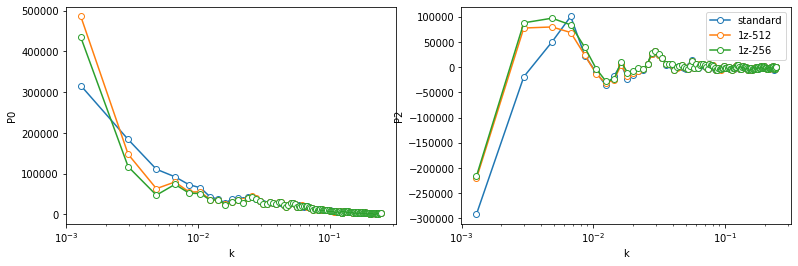

In [66]:
fig, ax = plt.subplots(ncols=2, figsize=(13, 4), sharex=True)


for ni, pki in pk.items():
    for j, ix in enumerate([1, 2]):        
        ax[j].plot(pki[0], pki[ix], label=ni, marker='o', mfc='w')
    
for j, yl in enumerate(['P0', 'P2']):
    ax[j].set_ylabel(yl)
    
for axi in ax:axi.set_xlabel('k')    
ax[0].set(xscale='log')
ax[1].legend()
fig.savefig('pk_methodshiz.png', dpi=300, bbox_inches='tight')

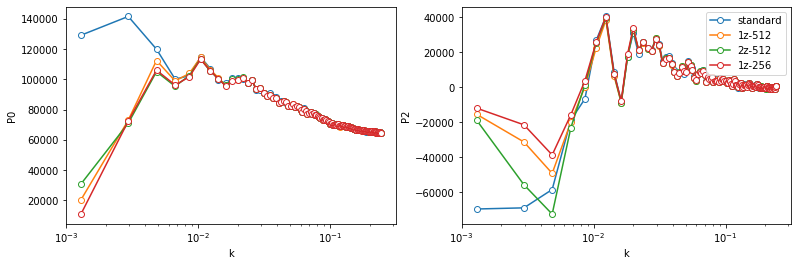

In [37]:
fig, ax = plt.subplots(ncols=2, figsize=(13, 4), sharex=True)


for ni, pki in pk.items():
    for j, ix in enumerate([1, 2]):        
        ax[j].plot(pki[0], pki[ix], label=ni, marker='o', mfc='w')
    
for j, yl in enumerate(['P0', 'P2']):
    ax[j].set_ylabel(yl)
    
for axi in ax:axi.set_xlabel('k')    
ax[0].set(xscale='log')
ax[1].legend()
fig.savefig('pk_methods.png', dpi=300, bbox_inches='tight')

In [6]:
import sys
sys.path.append('/home/mehdi/github/LSSutils')
from lssutils import setup_logging
from lssutils.lab import run_ConvolvedFFTPower, EbossCat

In [7]:
setup_logging('info')

In [46]:
galaxy = '/home/mehdi/data/eboss/data/v7_2/3.0/catalogs/eBOSS_QSO_full_NGC_known_mainhighz_512_v7_2.dat.fits'
random = galaxy.replace('.dat.', '.ran.')

result = run_ConvolvedFFTPower(galaxy, random, './test_combined3p0.json', zmin=0.8, zmax=3.0, return_pk=True)

[ 002559.26 ]   0: 12-07 22:50  CatalogSource   INFO     Extra arguments to FileType: ('/home/mehdi/data/eboss/data/v7_2/3.0/catalogs/eBOSS_QSO_full_NGC_known_mainhighz_512_v7_2.dat.fits',) {}
[ 002559.27 ]   0: 12-07 22:50  CatalogSource   INFO     Extra arguments to FileType: ('/home/mehdi/data/eboss/data/v7_2/3.0/catalogs/eBOSS_QSO_full_NGC_known_mainhighz_512_v7_2.ran.fits',) {}
[ 002776.71 ]   0: 12-07 22:54  FKPCatalog      INFO     cartesian coordinate range: [-3834.80600256 -3747.06544853   536.47534585] : [-190.77257492 3827.6866364  3813.34825412]
[ 002776.72 ]   0: 12-07 22:54  FKPCatalog      INFO     BoxSize = [3717. 7727. 3343.]
[ 002776.72 ]   0: 12-07 22:54  FKPCatalog      INFO     BoxCenter = [-2012.78928874    40.31059394  2174.91179998]
[ 002776.73 ]   0: 12-07 22:54  ConvolvedFFTPower INFO     using compensation function CompensateTSC for source 'first'
[ 002776.73 ]   0: 12-07 22:54  ConvolvedFFTPower INFO     using compensation function CompensateTSC for source '

In [10]:
result

In [19]:
import nbodykit.lab as nb

In [2]:
r = {}

r['0.8<z<2.2'] = nb.ConvolvedFFTPower.load('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_NGC_known_mainhighz_512_v7_2_main.json')
r['2.2<z<3.5'] = nb.ConvolvedFFTPower.load('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_NGC_known_mainhighz_512_v7_2_highz.json')
r['0.8<z<3.0'] = nb.ConvolvedFFTPower.load('./test_combined3p0.json')
r['0.8<z<3.5'] = nb.ConvolvedFFTPower.load('./test_combined.json')

In [8]:
plt.rc('font', size=15)

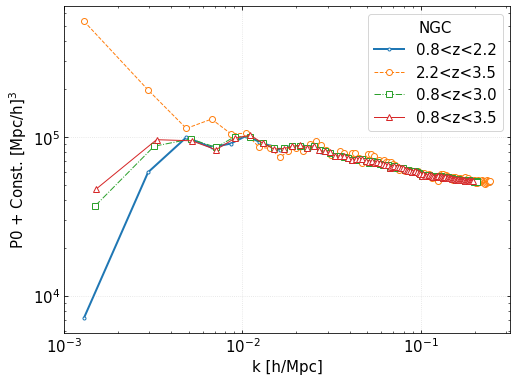

In [27]:
mk = ['.', 'o', 's', '^']
ls = ['-', '--', '-.', '-']
i = 0
plt.figure(figsize=(8., 6.))

for ni, pki in r.items():
    lw = 1 if ni != '0.8<z<2.2' else 2
    zo = -1 if ni == '0.8<z<2.2' else None
    plt.plot(pki.poles['k'], pki.poles['power_0'].real-pki.attrs['shotnoise']+5.0e4, 
             label=ni, ls=ls[i], marker=mk[i], mfc='w', lw=lw, zorder=zo)
    i += 1
    
plt.legend(title='NGC')    
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'P0 + Const. [Mpc/h]$^{3}$')
plt.xlabel('k [h/Mpc]')
plt.grid(alpha=0.4, ls=':')
plt.tick_params(direction='in', which='both', right=True, top=True)
plt.savefig('./pk_zext.png', dpi=300, bbox_inches='tight')
# plt.xscale('log')    